In [ ]:
#研究背景介绍：
#首先熟悉和观察犯罪信息和地理信息的关系
#因为几年来房价上涨，升起了购房热潮，于是便有了探究房价和其他因素的关系。
#在给出的数据中，有房价和犯罪类型，犯罪手段，地理信息等。。。。。。
#于是借用已有的信息对房价进行预测，
#

In [2]:
import  pandas as pd
import  numpy as np
import sklearn
import  seaborn as sns
import matplotlib.pyplot as plt

In [4]:

# 首先将冗余的数据直接drop掉。冗余的数据是直接用datagrip 将数据select 出来观察得到
raw_data=pd.read_csv("DC_Crime.csv")
raw_data=pd.DataFrame(raw_data)
raw_data.dropna(axis=0,how='any',subset=['WARD','START_DATE','DISTRICT','sector','PSA','BLOCK','VOTING_PRECINCT'],inplace=True)
raw_data.reset_index(inplace=True,drop=True)
# print(raw_data.loc[:,"BID"])
# print(raw_data.loc[:,"CENSUS_TRACT"])
# print(raw_data.loc[:,"ucr-rank"])
m=raw_data.isnull().sum(axis=0)
print(m)
print(raw_data.shape[1])

NEIGHBORHOOD_CLUSTER      5496
CENSUS_TRACT              1191
offensegroup                 0
LONGITUDE                    0
END_DATE                 26766
offense-text                 0
SHIFT                        0
YBLOCK                       0
DISTRICT                     0
WARD                         0
YEAR                         0
offensekey                   0
BID                     374238
sector                       0
PSA                          0
ucr-rank                     0
BLOCK_GROUP               1191
VOTING_PRECINCT              0
XBLOCK                       0
BLOCK                        0
START_DATE                   0
CCN                          0
OFFENSE                      0
OCTO_RECORD_ID               0
ANC                          0
REPORT_DAT                   0
METHOD                       0
location                     0
LATITUDE                     0
dtype: int64
29


In [5]:
#去除重复且啰嗦的数据列
raw_data=pd.DataFrame(raw_data.loc[:,['METHOD','OFFENSE','NEIGHBORHOOD_CLUSTER','CENSUS_TRACT','XBLOCK','BLOCK','YBLOCK','DISTRICT','WARD','sector','PSA','LONGITUDE','LATITUDE','VOTING_PRECINCT','CCN','OCTO_RECORD_ID','ANC','BLOCK_GROUP','YEAR','START_DATE','SHIFT','REPORT_DAT']])


In [6]:
#目前缺失值的情况
m=raw_data.isnull().sum(axis=0)
print(m)
print(len(m))
print(raw_data.shape[0])

METHOD                     0
OFFENSE                    0
NEIGHBORHOOD_CLUSTER    5496
CENSUS_TRACT            1191
XBLOCK                     0
BLOCK                      0
YBLOCK                     0
DISTRICT                   0
WARD                       0
sector                     0
PSA                        0
LONGITUDE                  0
LATITUDE                   0
VOTING_PRECINCT            0
CCN                        0
OCTO_RECORD_ID             0
ANC                        0
BLOCK_GROUP             1191
YEAR                       0
START_DATE                 0
SHIFT                      0
REPORT_DAT                 0
dtype: int64
22
448866


In [8]:
#去除START_DATE ,end_time 小于2008年的数据。因为发现2008年之前的数据有异常
for i in range(raw_data.shape[0]):
    if int(raw_data.loc[i,'START_DATE'][0:4])<2008:
        raw_data.drop(index=i,inplace=True)

raw_data.reset_index(inplace=True,drop=True)
print(raw_data.shape[0])
raw_data.to_csv(r'raw_data_crime.csv',index = None)

448418


In [9]:
#观察每年中 各个offense的发生次数
dectect_year_offence=raw_data[['YEAR','OFFENSE']]
#dectect_year_offence=pd.DataFrame(raw_data.groupby(['YEAR'])['OFFENSE'].value_counts())

dectect_year_offence=pd.DataFrame(dectect_year_offence.groupby(['YEAR'],as_index=False).size())
print(dectect_year_offence)

    YEAR   size
0   2008  33958
1   2009  31223
2   2010  31635
3   2011  33255
4   2012  35273
5   2013  35853
6   2014  38399
7   2015  37248
8   2016  37203
9   2017  33107
10  2018  33749
11  2019  33906
12  2020  27866
13  2021   5743


In [11]:
shift_offense=raw_data.groupby(['SHIFT'],as_index=False).count()
shift_offense

,SHIFT,METHOD,OFFENSE,NEIGHBORHOOD_CLUSTER,CENSUS_TRACT,XBLOCK,BLOCK,YBLOCK,DISTRICT,WARD,...,LONGITUDE,LATITUDE,VOTING_PRECINCT,CCN,OCTO_RECORD_ID,ANC,BLOCK_GROUP,YEAR,START_DATE,REPORT_DAT
0,day,169329,169329,167280,168927,169329,169329,169329,169329,169329,...,169329,169329,169329,169329,169329,169329,168927,169329,169329,169329
1,evening,191672,191672,189319,191198,191672,191672,191672,191672,191672,...,191672,191672,191672,191672,191672,191672,191198,191672,191672,191672
2,midnight,87417,87417,86337,87102,87417,87417,87417,87417,87417,...,87417,87417,87417,87417,87417,87417,87102,87417,87417,87417


over


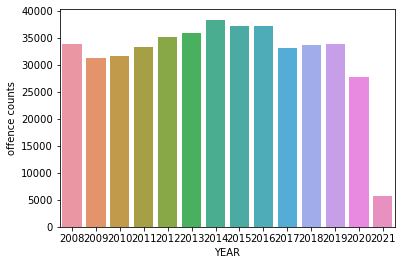

In [8]:
#将每年中 各个offense的发生次数 可视化
ab=sns.barplot(x='YEAR',y='size',data=dectect_year_offence)
print("over")
plt.xlabel("YEAR")
plt.ylabel("offence counts")
plt.show()

In [9]:
#观察每个月中offence发生的次数
dectect_shift_offence=raw_data[['SHIFT','OFFENSE']]
dectect_shift_offence=pd.DataFrame(raw_data.groupby(['SHIFT'],as_index=False)['OFFENSE'].size())
print(dectect_shift_offence)


      SHIFT    size
0       day  169329
1   evening  191672
2  midnight   87417


over


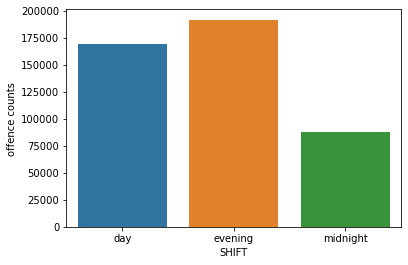

In [10]:
#观察每个时间段发生的次数
ab=sns.barplot(x='SHIFT',y='size',data=dectect_shift_offence)
print("over")
plt.xlabel("SHIFT")
plt.ylabel("offence counts")
plt.show()



In [11]:
#观察每个月发生的次数
dectect_month_offence=pd.DataFrame(raw_data[['REPORT_DAT','OFFENSE']])
dectect_month_offence['REPORT_DAT']=dectect_month_offence['REPORT_DAT'].str[5:7]
dectect_month_offence=pd.DataFrame(dectect_month_offence.groupby(['REPORT_DAT'],as_index=False)['OFFENSE'].size())
print(dectect_month_offence)

   REPORT_DAT   size
0          01  36963
1          02  30739
2          03  33976
3          04  33319
4          05  38018
5          06  38991
6          07  40640
7          08  40831
8          09  39675
9          10  41301
10         11  37192
11         12  36773


over


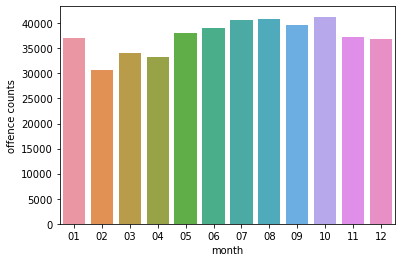

In [12]:
#每个月发生的次数进行可视化
ab=sns.barplot(x='REPORT_DAT',y='size',data=dectect_month_offence)
print("over")
plt.xlabel("month")
plt.ylabel("offence counts")
plt.show()

In [13]:
# offence 和method  的关系
dectect_offence_method=pd.DataFrame(raw_data[['OFFENSE','METHOD']])
dectect_offence_method=pd.DataFrame(dectect_offence_method.groupby(['OFFENSE','METHOD'],as_index=False).size())
print(dectect_offence_method)

                       OFFENSE  METHOD    size
0                        arson     gun       1
1                        arson   knife       1
2                        arson  others     353
3   assault w/dangerous weapon     gun    8983
4   assault w/dangerous weapon   knife   10411
5   assault w/dangerous weapon  others    9461
6                     burglary     gun     319
7                     burglary   knife     119
8                     burglary  others   35419
9                     homicide     gun    1372
10                    homicide   knife     196
11                    homicide  others     228
12         motor vehicle theft     gun      14
13         motor vehicle theft   knife       6
14         motor vehicle theft  others   42043
15                     robbery     gun   15979
16                     robbery   knife    2450
17                     robbery  others   23736
18                   sex abuse     gun     175
19                   sex abuse   knife     200
20           

over


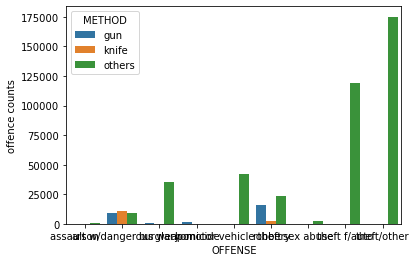

In [14]:
#可视化 offence 和method  的关系
ab=sns.barplot(x='OFFENSE',y='size',hue='METHOD',data=dectect_offence_method)
print("over")
plt.xlabel("OFFENSE")
plt.ylabel("offence counts")
plt.show()

    WARD                     OFFENSE  size
0    1.0                       arson     9
1    1.0  assault w/dangerous weapon   483
2    1.0                    burglary  1377
3    1.0         motor vehicle theft  1570
4    1.0                     robbery  1164
..   ...                         ...   ...
58   8.0         motor vehicle theft  3468
59   8.0                     robbery  1689
60   8.0                   sex abuse   162
61   8.0                theft f/auto  4073
62   8.0                 theft/other  4874

[63 rows x 3 columns]
over


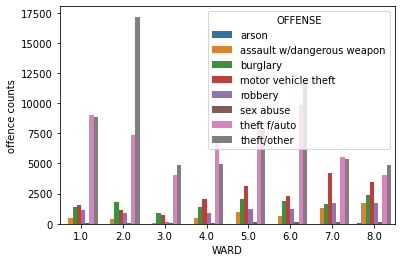

In [15]:
#  offense 类型随时间和地点的变化图
dectect_offence_shift_ward=pd.DataFrame(raw_data[['OFFENSE','SHIFT','WARD']])

#day 时间的ward 和offense 类型犯罪的数量统计
dectect_offence_shift_ward.drop(index=dectect_offence_shift_ward[(raw_data.loc[:,'SHIFT']!='day')].index,inplace=True)
dectect_offence_shift_ward.reset_index(inplace=True,drop=True)

dectect_offence_shift_ward=pd.DataFrame(dectect_offence_shift_ward[['OFFENSE','WARD']])
dectect_offence_shift_ward=pd.DataFrame(dectect_offence_shift_ward.groupby(['WARD','OFFENSE'],as_index=False).size())


print(dectect_offence_shift_ward)

#不同的ward不同offense的犯罪数量的观察

ab=sns.barplot(x='WARD',y='size',hue='OFFENSE',data=dectect_offence_shift_ward)
print("over")
plt.xlabel("WARD")
plt.ylabel("offence counts")
plt.show()

       SHIFT  WARD   size
0        day   1.0  22560
1        day   2.0  28943
2        day   3.0  10812
3        day   4.0  16813
4        day   5.0  23883
5        day   6.0  27925
6        day   7.0  19910
7        day   8.0  18483
8    evening   1.0  26702
9    evening   2.0  38357
10   evening   3.0  11422
11   evening   4.0  16901
12   evening   5.0  24395
13   evening   6.0  30360
14   evening   7.0  23174
15   evening   8.0  20361
16  midnight   1.0  14159
17  midnight   2.0  14417
18  midnight   3.0   2186
19  midnight   4.0   7087
20  midnight   5.0  12791
21  midnight   6.0  12411
22  midnight   7.0  12398
23  midnight   8.0  11968
object
   SHIFT  WARD   size
0      0   1.0  22560
1      0   2.0  28943
2      0   3.0  10812
3      0   4.0  16813
4      0   5.0  23883
5      0   6.0  27925
6      0   7.0  19910
7      0   8.0  18483
8      1   1.0  26702
9      1   2.0  38357
10     1   3.0  11422
11     1   4.0  16901
12     1   5.0  24395
13     1   6.0  30360
14     1   7.

<AxesSubplot:xlabel='WARD', ylabel='SHIFT'>

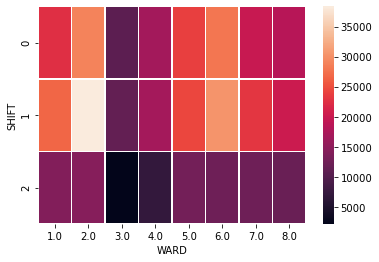

In [16]:
#热力图作品,对于shift 和ward 的offense的犯罪数量的变化
import  pandas as pd
data_shift_ward_count=pd.DataFrame(raw_data[['SHIFT','WARD','OFFENSE']])

# print(data_shift_ward_count)

data_shift_ward_count=pd.DataFrame(data_shift_ward_count.groupby(['SHIFT','WARD'],as_index=False)['OFFENSE'].size())
print(data_shift_ward_count)
print(data_shift_ward_count['SHIFT'].dtype)

for i in range(data_shift_ward_count.shape[0]):
    if data_shift_ward_count.loc[i,'SHIFT']=='day':
        data_shift_ward_count.loc[i,'SHIFT']=0
    if data_shift_ward_count.loc[i,'SHIFT']=='evening':
        data_shift_ward_count.loc[i,'SHIFT']=1
    if data_shift_ward_count.loc[i,'SHIFT']=='midnight':
        data_shift_ward_count.loc[i,'SHIFT']=2

        
        
print(data_shift_ward_count)
data_shift_ward_count['SHIFT']=data_shift_ward_count['SHIFT'].astype(int)
print(data_shift_ward_count['SHIFT'].dtype)

data_shift_ward_count=data_shift_ward_count.pivot('SHIFT','WARD','size')
print (data_shift_ward_count)
sns.heatmap(data_shift_ward_count,linewidths=0.5)
#如果根据ward分类，发现day 和evening的时候发生的犯罪数量更多

       SHIFT  DISTRICT   size
0        day       1.0  25137
1        day       2.0  31209
2        day       3.0  29534
3        day       4.0  23112
4        day       5.0  22727
5        day       6.0  21628
6        day       7.0  15982
7    evening       1.0  28805
8    evening       2.0  38367
9    evening       3.0  34295
10   evening       4.0  24139
11   evening       5.0  23435
12   evening       6.0  24652
13   evening       7.0  17979
14  midnight       1.0  11088
15  midnight       2.0  11321
16  midnight       3.0  17721
17  midnight       4.0  10492
18  midnight       5.0  12983
19  midnight       6.0  13145
20  midnight       7.0  10667
object
int32
DISTRICT    1.0    2.0    3.0    4.0    5.0    6.0    7.0
SHIFT                                                    
0         25137  31209  29534  23112  22727  21628  15982
1         28805  38367  34295  24139  23435  24652  17979
2         11088  11321  17721  10492  12983  13145  10667


<AxesSubplot:xlabel='DISTRICT', ylabel='SHIFT'>

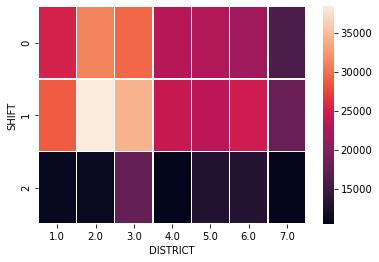

In [17]:
data_shift_district_count=pd.DataFrame(raw_data[['SHIFT','DISTRICT','OFFENSE']])



# print(data_shift_ward_count)

data_shift_district_count=pd.DataFrame(data_shift_district_count.groupby(['SHIFT','DISTRICT'],as_index=False)['OFFENSE'].size())
print(data_shift_district_count)
print(data_shift_district_count['SHIFT'].dtype)

for i in range(data_shift_district_count.shape[0]):
    if data_shift_district_count.loc[i,'SHIFT']=='day':
        data_shift_district_count.loc[i,'SHIFT']=0
    if data_shift_district_count.loc[i,'SHIFT']=='evening':
        data_shift_district_count.loc[i,'SHIFT']=1
    if data_shift_district_count.loc[i,'SHIFT']=='midnight':
        data_shift_district_count.loc[i,'SHIFT']=2

        
data_shift_district_count['SHIFT']=data_shift_district_count['SHIFT'].astype(int)
print(data_shift_district_count['SHIFT'].dtype)

data_shift_district_count=data_shift_district_count.pivot('SHIFT','DISTRICT','size')
print (data_shift_district_count)
sns.heatmap(data_shift_district_count,linewidths=0.5)
#根据district 进行分类，发现也是day 和evening的 犯罪数量最多

       SHIFT sector   size
0        day    1D1   7200
1        day    1D2  11327
2        day    1D3   6345
3        day    2D1   7031
4        day    2D2   9146
..       ...    ...    ...
58  midnight    6D2   3490
59  midnight    6D3   4639
60  midnight    7D1   3809
61  midnight    7D2   3804
62  midnight    7D3   3096

[63 rows x 3 columns]
object
int32
sector    1D1    1D2   1D3   2D1    2D2    2D3    3D1    3D2    3D3   4D1  \
SHIFT                                                                       
0        7200  11327  6345  7031   9146  15078   9019  10082  10531  8316   
1       10011  11305  7148  8008  11283  19140  11012  11986  11435  8670   
2        4337   3979  2533  1353   2300   7699   4510   7282   6020  3664   

sector  ...   4D3   5D1   5D2   5D3   6D1   6D2   6D3   7D1   7D2   7D3  
SHIFT   ...                                                              
0       ...  7373  6437  9432  6903  7833  7063  6745  5673  5800  4571  
1       ...  8065  7001  8643  7

<AxesSubplot:xlabel='sector', ylabel='SHIFT'>

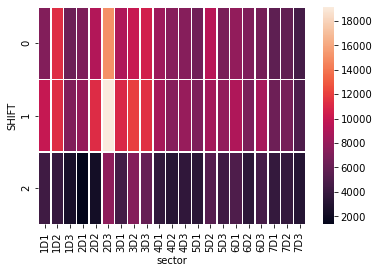

In [18]:
#绘出sector不同时和犯罪数量的热力图
data_shift_sector_count=pd.DataFrame(raw_data[['SHIFT','sector','OFFENSE']])
# print(data_shift_ward_count)

data_shift_sector_count=pd.DataFrame(data_shift_sector_count.groupby(['SHIFT','sector'],as_index=False)['OFFENSE'].size())
print(data_shift_sector_count)
print(data_shift_sector_count['SHIFT'].dtype)

for i in range(data_shift_sector_count.shape[0]):
    if data_shift_sector_count.loc[i,'SHIFT']=='day':
        data_shift_sector_count.loc[i,'SHIFT']=0
    if data_shift_sector_count.loc[i,'SHIFT']=='evening':
        data_shift_sector_count.loc[i,'SHIFT']=1
    if data_shift_sector_count.loc[i,'SHIFT']=='midnight':
        data_shift_sector_count.loc[i,'SHIFT']=2

data_shift_sector_count['SHIFT']=data_shift_sector_count['SHIFT'].astype(int)
print(data_shift_sector_count['SHIFT'].dtype)

data_shift_sector_count=data_shift_sector_count.pivot('SHIFT','sector','size')
print (data_shift_sector_count)
sns.heatmap(data_shift_sector_count,linewidths=0.5)

WARD   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0
YEAR                                                
2008  4896  6244  1854  2982  4058  5136  4358  4430
2009  4425  5828  1958  2855  3682  4514  3744  4217
2010  4356  5574  1927  3095  3969  4234  4006  4474
2011  4879  6159  1923  2908  4279  4771  4023  4313
2012  4997  6549  1788  2990  4772  5476  4335  4366
2013  5406  5958  1950  3267  4601  5625  4612  4434
2014  5406  6773  1831  3811  5398  5995  5101  4084
2015  5251  6780  1914  3540  5202  6067  4458  4036
2016  5445  7305  1795  3192  4908  6401  4273  3884
2017  4630  5969  1575  2887  4807  5510  4310  3419
2018  4629  6254  1935  3107  5008  5622  4075  3119
2019  4728  7115  1957  2894  5081  5639  3736  2756
2020  3529  4360  1702  2700  4374  4747  3716  2738
2021   844   849   311   573   930   959   735   542


<AxesSubplot:xlabel='WARD', ylabel='YEAR'>

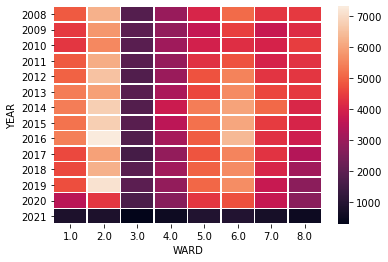

In [19]:
#根据时间绘画出ward 和year的热力图。
data_year_ward_count=pd.DataFrame(raw_data[['YEAR','WARD','OFFENSE']])
data_year_ward_count=pd.DataFrame(data_year_ward_count.groupby(['YEAR','WARD'],as_index=False)['OFFENSE'].size())
data_year_ward_count['YEAR']=data_year_ward_count['YEAR'].astype(int)

data_year_ward_count=data_year_ward_count.pivot('YEAR','WARD','size')
print (data_year_ward_count)
sns.heatmap(data_year_ward_count,linewidths=0.5)

sector   1D1   1D2   1D3   2D1   2D2   2D3   3D1   3D2   3D3   4D1  ...   4D3  \
YEAR                                                                ...         
2008    1795  2068  1087  1165  1718  3130  1905  2145  2287  1534  ...  1360   
2009    1557  1789  1004  1260  1745  2985  1765  1844  2004  1448  ...  1320   
2010    1498  1677   946  1180  1751  2899  1765  1765  1898  1595  ...  1367   
2011    1720  2006   936  1193  1803  3101  1951  1993  2236  1488  ...  1449   
2012    1649  2224  1219  1160  1657  3221  1851  2409  2312  1540  ...  1511   
2013    1547  2339  1312  1437  1611  2886  2104  2212  2126  1561  ...  1722   
2014    1840  2395  1294  1341  1722  3284  2173  2379  2344  2025  ...  1728   
2015    1735  2318  1464  1299  1783  3496  2098  2296  2227  1881  ...  1733   
2016    2059  2206  1481  1195  1743  3858  2025  2813  2579  1604  ...  1517   
2017    1675  1826  1416  1071  1698  3003  1813  2142  1946  1418  ...  1410   
2018    1642  1763  1329  13

<AxesSubplot:xlabel='sector', ylabel='YEAR'>

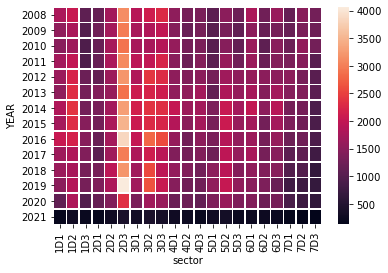

In [21]:
#同理，观察sector不同，year 不同和犯罪数量的关系
data_year_sector_count=pd.DataFrame(raw_data[['YEAR','sector','OFFENSE']])
data_year_sector_count=pd.DataFrame(data_year_sector_count.groupby(['YEAR','sector'],as_index=False)['OFFENSE'].size())
data_year_sector_count['YEAR']=data_year_sector_count['YEAR'].astype(int)

data_year_sector_count=data_year_sector_count.pivot('YEAR','sector','size')
print (data_year_sector_count)
sns.heatmap(data_year_sector_count,linewidths=0.5)

   REPORT_DAT  WARD  size
0          01   1.0  5032
1          01   2.0  6858
2          01   3.0  2039
3          01   4.0  3456
4          01   5.0  5177
..        ...   ...   ...
91         12   4.0  3343
92         12   5.0  5038
93         12   6.0  5764
94         12   7.0  4667
95         12   8.0  4181

[96 rows x 3 columns]
WARD         1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0
REPORT_DAT                                                
1           5032  6858  2039  3456  5177  5692  4583  4126
2           4396  5886  1868  2854  4098  4600  3666  3371
3           4896  6552  1971  2968  4705  4994  4096  3794
4           4703  5966  1840  3133  4680  4938  4099  3960
5           5399  6667  2104  3606  5144  5711  4876  4511
6           5666  6991  2214  3494  5101  6345  4826  4354
7           5764  7172  2082  3626  5545  6742  5109  4600
8           5609  7436  2111  3702  5598  6726  5010  4639
9           5598  7045  2078  3616  5469  6585  4886  4398
10          5904

<AxesSubplot:xlabel='WARD', ylabel='REPORT_DAT'>

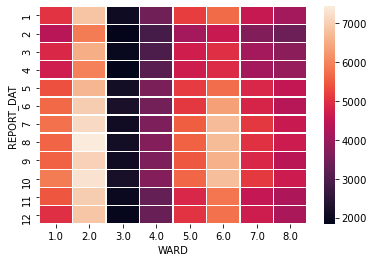

In [22]:
#month 案件报道时间的热力图关系绘制
data_month_ward_count=pd.DataFrame(raw_data[['REPORT_DAT','WARD','OFFENSE']])
data_month_ward_count['REPORT_DAT']=data_month_ward_count['REPORT_DAT'].str[5:7]


data_month_ward_count=pd.DataFrame(data_month_ward_count.groupby(['REPORT_DAT','WARD'],as_index=False)['OFFENSE'].size())
print(data_month_ward_count)

data_month_ward_count['REPORT_DAT']=data_month_ward_count['REPORT_DAT'].astype(int)

data_month_ward_count=data_month_ward_count.pivot('REPORT_DAT','WARD','size')
print (data_month_ward_count)
sns.heatmap(data_month_ward_count,linewidths=0.5)

In [24]:
#采用kmeans分类方法对block 进行聚类
data_block_count=pd.DataFrame(raw_data[['BLOCK','OFFENSE']])
data_block_count=pd.DataFrame(data_block_count.groupby(['BLOCK'],as_index=False)['OFFENSE'].size())
print(data_block_count)

from sklearn.cluster import KMeans
kmeans2=KMeans(n_clusters=4,random_state=9)

y_pred = kmeans2.fit_predict(data_block_count.values[:,1].reshape(-1,1))
# print(y_pred)

res0Series = pd.Series(kmeans2.labels_)
res0 = res0Series[res0Series.values == 0]
result_0=data_block_count.iloc[res0.index]
result_0.reset_index(inplace=True,drop=True)
print("类别为0的数据\n",(result_0))

res1Series = pd.Series(kmeans2.labels_)
res1 = res0Series[res1Series.values == 1]
result_1=data_block_count.iloc[res1.index]
result_1.reset_index(inplace=True,drop=True)
print("类别为1的数据\n",(result_1))

res2Series = pd.Series(kmeans2.labels_)
res2 = res0Series[res2Series.values == 2]
result_2=data_block_count.iloc[res2.index]
result_2.reset_index(inplace=True,drop=True)
print("类别为2的数据\n",(result_2))

res3Series = pd.Series(kmeans2.labels_)
res3 = res0Series[res3Series.values == 3]
result_3=data_block_count.iloc[res3.index]
result_3.reset_index(inplace=True,drop=True)
print("类别为3的数据\n",(result_3))
from sklearn import metrics

deal_with=pd.DataFrame(raw_data[['BLOCK','LATITUDE','LONGITUDE']])
deal_with['flag']=0
deal_with['flag']=deal_with['flag'].astype(int)
print(deal_with)
lei0=result_0['BLOCK'].values.tolist()
lei1=result_1['BLOCK'].values.tolist()
lei2=result_2['BLOCK'].values.tolist()
lei3=result_3['BLOCK'].values.tolist()

# print(lei0)
deal_with.reset_index(inplace=True,drop=True)

print(deal_with.loc[0,'BLOCK'])
print(deal_with.loc[1,'BLOCK'])
for i in range(deal_with.shape[0]):
    if deal_with.loc[i,'BLOCK'] in lei0:
         deal_with['flag']=0
         continue
    if deal_with.loc[i,'BLOCK'] in lei1:
         deal_with['flag']=1
         continue
    if deal_with.loc[i,'BLOCK'] in lei2:
         deal_with['flag']=2
         continue
    if deal_with.loc[i,'BLOCK'] in lei3:
         deal_with['flag']=3
         continue
        
        


                                             BLOCK  size
0                    0 - 0 block of 14th street sw     3
1      0 - 0 block of arlington memorial bridge sw     2
2                   0 - 0 block of chain bridge nw     1
3             0 - 0 block of chevy chase circle nw    13
4                0 - 0 block of columbus circle ne    19
...                                            ...   ...
17434            yuma street nw and 42nd street nw     1
17435             yuma street se and 1st street se     1
17436             yuma street se and 8th street se     5
17437             yuma street se and 9th street se     3
17438         yuma street se and condon terrace se     1

[17439 rows x 2 columns]
类别为0的数据
                                              BLOCK  size
0                    0 - 0 block of 14th street sw     3
1      0 - 0 block of arlington memorial bridge sw     2
2                   0 - 0 block of chain bridge nw     1
3             0 - 0 block of chevy chase circle nw   

KeyboardInterrupt: 

In [ ]:
#one -hot 编码作案手段
OFFENSE_dummies=pd.get_dummies(raw_data["OFFENSE"],prefix="OFFENSE")
OFFENSE_dummies.head(10)
raw_data=pd.concat([raw_data,OFFENSE_dummies],axis=1)
print(raw_data)

In [ ]:

data_xblock_count=pd.DataFrame(raw_data[['XBLOCK','OFFENSE']])
data_xblock_count=pd.DataFrame(data_xblock_count.groupby(['XBLOCK'],as_index=False)['OFFENSE'].size())
#data_xblock_count['XBLOCK']=data_xblock_count['XBLOCK'].astype(int)
# data_xblock_count['YBLOCK']=data_xblock_count['YBLOCK'].astype(int)
data_xblock_count

0.6838050250369521
2


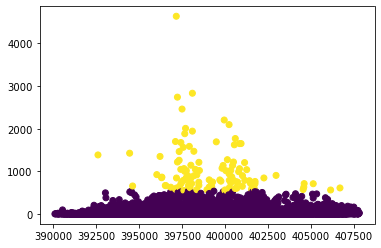

        XBLOCK  size  y_pred
0     390103.0     1       0
1     390147.0     6       0
2     390151.0     1       0
3     390224.0     1       0
4     390262.0    14       0
...        ...   ...     ...
7638  407727.0    82       0
7639  407736.0    18       0
7640  407760.0     1       0
7641  407795.0    22       0
7642  407806.0    21       0

[7643 rows x 3 columns]


In [39]:

from sklearn import metrics
data_show_julei=pd.DataFrame(raw_data[['LATITUDE','LONGITUDE','XBLOCK']])
data_show_julei['flag']=0
from sklearn.cluster import KMeans
score=0
cluster_temp=0
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=9)
# y_pred = kmeans.fit_predict( data_xblock_count.values[:,1].reshape(-1,1))
    y_pred = kmeans.fit_predict(data_xblock_count.values[:,1].reshape(-1,1))
    a=metrics.silhouette_score(data_xblock_count.values[:,1].reshape(-1,1), y_pred)
    if a >score:
        score=a
        cluster_temp=i

print(a)
print(cluster_temp)
#所以结果最好是分成两类 
# plt.scatter(data_xblock_count.values[:,0], data_xblock_count.values[:,1], c=y_pred)
# plt.show()
from sklearn import metrics
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=cluster_temp,random_state=9)
y_pred = kmeans.fit_predict(data_xblock_count.values[:,1].reshape(-1,1))
plt.scatter(data_xblock_count.values[:,0], data_xblock_count.values[:,1], c=y_pred)
plt.show()

data_xblock_count['y_pred']=y_pred
print(data_xblock_count)

# res0Series = pd.Series(kmeans.labels_)
# res0 = res0Series[res0Series.values == 0]
# result_0=data_xblock_count.iloc[res0.index]
# result_0.reset_index(inplace=True,drop=True)
# print("类别为0的数据\n",(data_xblock_count.iloc[res0.index]))

# res1Series = pd.Series(kmeans.labels_)
# res1 = res1Series[res1Series.values == 1]
# result_1=data_xblock_count.iloc[res1.index]
# result_1.reset_index(inplace=True,drop=True)
# print("类别为1的数据\n",(data_xblock_count.iloc[res1.index]))

# res2Series = pd.Series(kmeans.labels_)
# res2 = res2Series[res2Series.values == 2]
# result_2=data_xblock_count.iloc[res2.index]
# result_2.reset_index(inplace=True,drop=True)
# print("类别为2的数据\n",(data_xblock_count.iloc[res2.index]))

# res3Series = pd.Series(kmeans.labels_)
# res3 = res3Series[res3Series.values == 3]
# result_3=data_xblock_count.iloc[res3.index]
# result_3.reset_index(inplace=True,drop=True)
# print("类别为3的数据\n",(data_xblock_count.iloc[res3.index]))

In [43]:
res0Series = pd.Series(kmeans.labels_)
res0 = res0Series[res0Series.values == 0]
result_0=data_xblock_count.iloc[res0.index]
result_0.reset_index(inplace=True,drop=True)
print("类别为0的数据\n",(data_xblock_count.iloc[res0.index]))

res1Series = pd.Series(kmeans.labels_)
res1 = res1Series[res1Series.values == 1]
result_1=data_xblock_count.iloc[res1.index]
result_1.reset_index(inplace=True,drop=True)
print("类别为1的数据\n",(data_xblock_count.iloc[res1.index]))

# res2Series = pd.Series(kmeans.labels_)
# res2 = res2Series[res2Series.values == 2]
# result_2=data_xblock_count.iloc[res2.index]
# result_2.reset_index(inplace=True,drop=True)
# print("类别为2的数据\n",(data_xblock_count.iloc[res2.index]))

# res3Series = pd.Series(kmeans.labels_)
# res3 = res3Series[res3Series.values == 3]
# result_3=data_xblock_count.iloc[res3.index]
# result_3.reset_index(inplace=True,drop=True)
# print("类别为3的数据\n",(data_xblock_count.iloc[res3.index]))

类别为0的数据
         XBLOCK  size  y_pred
0     390103.0     1       0
1     390147.0     6       0
2     390151.0     1       0
3     390224.0     1       0
4     390262.0    14       0
...        ...   ...     ...
7638  407727.0    82       0
7639  407736.0    18       0
7640  407760.0     1       0
7641  407795.0    22       0
7642  407806.0    21       0

[7530 rows x 3 columns]
类别为1的数据
         XBLOCK  size  y_pred
417   392607.0  1384       1
1213  394449.0  1425       1
1300  394622.0   656       1
1895  396029.0   923       1
1990  396217.0  1349       1
...        ...   ...     ...
6749  404579.0   630       1
6752  404600.0   712       1
6904  405127.0   709       1
7299  406139.0   562       1
7492  406683.0   610       1

[113 rows x 3 columns]


In [40]:
# 0 是很少， 1 是最多， 2是第二多， 3是第三多,  如果是分成4类的话
lll=data_xblock_count.shape[0]
for i in range(lll):
    #data_show_julei[data_show_julei['XBLOCK']==data_xblock_count.loc[i,'XBLOCK']]['flag']=data_xblock_count.loc[i,'y_pred']
     data_show_julei.loc[data_show_julei['XBLOCK']==data_xblock_count.loc[i,'XBLOCK'],'flag']=data_xblock_count.loc[i,'y_pred']

In [41]:
data_show_julei

,LATITUDE,LONGITUDE,XBLOCK,flag
0,38.911114,-77.003574,399690.0,0
1,38.982384,-77.026557,397699.0,0
2,38.902518,-77.020913,398186.0,1
3,38.890943,-76.919601,406975.0,0
4,38.822840,-77.003927,399659.0,0
...,...,...,...,...
448413,38.921282,-76.977167,401980.0,0
448414,38.909640,-77.035546,396917.0,0
448415,38.902203,-76.982015,401560.0,1
448416,38.905978,-76.990857,400793.0,0


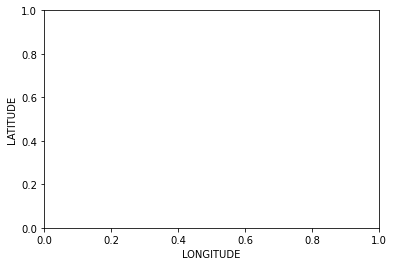

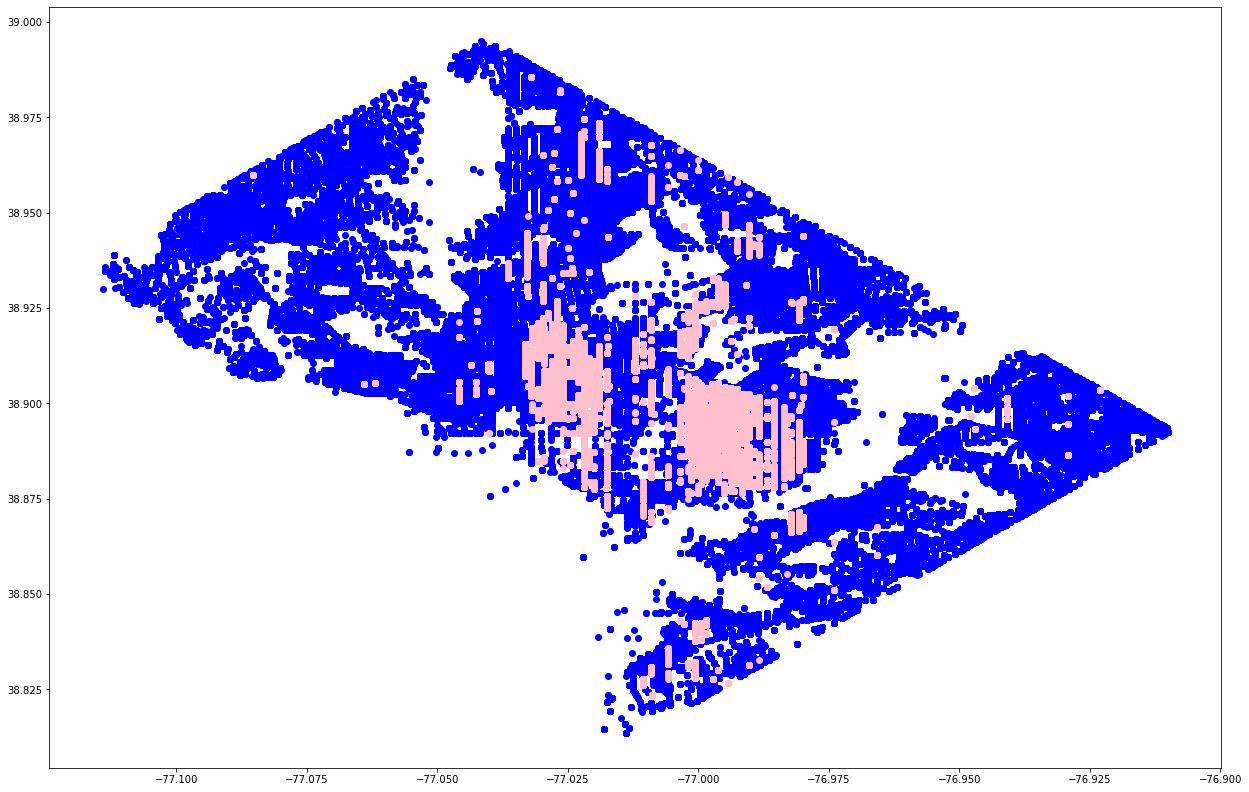

In [42]:
# 0 是犯罪很少  蓝色， 1 是最多  粉色， 2是第二多 绿黄色 ， 3是第三多  红色
# 分成两类的结果：   1 粉色是重灾区，  0是蓝色
plt.xlabel('LONGITUDE')
plt.ylabel('LATITUDE')
plt.figure(figsize=(21,14))
#,'#00FF00','#FF0000'
colors=['#0000FF','#FFC0CB']
for i in range(2):
    a=data_show_julei[data_show_julei['flag']==i]
    data1=a['LONGITUDE']
    data2=a['LATITUDE']
    plt.scatter(data1,data2,c=colors[i])
plt.show()
#

In [6]:
#对block 进行预测：

data_block_count=pd.DataFrame(raw_data[['BLOCK','OFFENSE']])
data_block_count=pd.DataFrame(data_block_count.groupby(['BLOCK'],as_index=False)['OFFENSE'].size())
#data_xblock_count['XBLOCK']=data_xblock_count['XBLOCK'].astype(int)
# data_xblock_count['YBLOCK']=data_xblock_count['YBLOCK'].astype(int)
data_block_count
from sklearn import metrics
data_show_block=pd.DataFrame(raw_data[['LATITUDE','LONGITUDE','BLOCK']])
data_show_block['flag']=0


In [7]:

from sklearn.cluster import KMeans
score=0
cluster_temp=0
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,random_state=9)
# y_pred = kmeans.fit_predict( data_xblock_count.values[:,1].reshape(-1,1))
    y_pred = kmeans.fit_predict(data_block_count.values[:,1].reshape(-1,1))
    a=metrics.silhouette_score(data_block_count.values[:,1].reshape(-1,1), y_pred)
    if a >score:
        score=a
        cluster_temp=i

print(a)
print(cluster_temp)
#所以结果最好是分成两类 
# plt.scatter(data_xblock_count.values[:,0], data_xblock_count.values[:,1], c=y_pred)
# plt.show()


0.6866753962529378
2


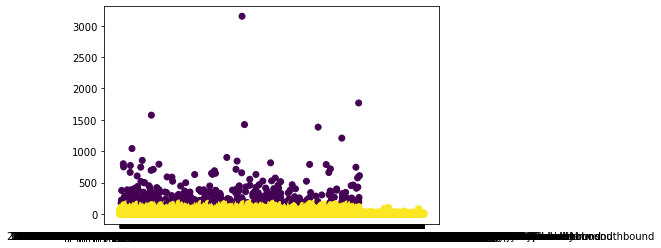

                                             BLOCK  size  y_pred
0                    0 - 0 block of 14th street sw     3       1
1      0 - 0 block of arlington memorial bridge sw     2       1
2                   0 - 0 block of chain bridge nw     1       1
3             0 - 0 block of chevy chase circle nw    13       1
4                0 - 0 block of columbus circle ne    19       1
...                                            ...   ...     ...
17434            yuma street nw and 42nd street nw     1       1
17435             yuma street se and 1st street se     1       1
17436             yuma street se and 8th street se     5       1
17437             yuma street se and 9th street se     3       1
17438         yuma street se and condon terrace se     1       1

[17439 rows x 3 columns]


In [8]:
kmeans=KMeans(n_clusters=cluster_temp,random_state=9)
y_pred = kmeans.fit_predict(data_block_count.values[:,1].reshape(-1,1))
plt.scatter(data_block_count.va###Task3-Part2###lues[:,0], data_block_count.values[:,1], c=y_pred)
plt.show()

data_block_count['y_pred']=y_pred
print(data_block_count)